# Image Processing Test Case V3.0

## Code by: Joshua Collins, Group 1 - RSEP

In this image processing test-case a single grain in a microstructural image will be separated and then segmented using the 'skikit-image' processing package and then meshed to prepare them for finite element modelling.

The image to be processed is a brightfield image of a Ti6Al4V alloy (the same image used in test_case V3.0) and was provided by Dr Pratheek Shantraj.

### 1. Importing Packages

In [1]:
import skimage
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage import exposure
from skimage.filters import sobel
from skimage.morphology import watershed
from scipy import ndimage as ndi
from skimage import measure
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing, square

import os
import numpy as np
import matplotlib.pyplot as plt

### 2. Reading the Image

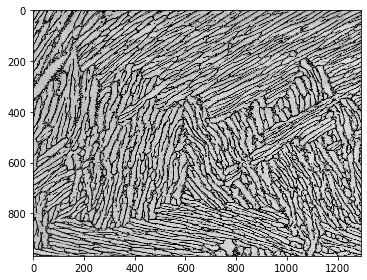

In [2]:
grains = io.imread('Ti64_V1.0.jpg')
io.imshow(grains)
io.show()

In [3]:
print('The image type is:', grains.dtype, ', and its shape is:', grains.shape)

The image type is: uint8 , and its shape is: (968, 1292, 3)


### 3. Isolating a Single Grain

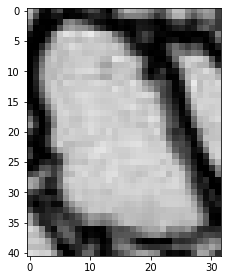

In [4]:
iso_grain = grains[644:685,818:850]
io.imshow(iso_grain)

### 4. Manipulating the Image

In [5]:
grayscale = rgb2gray(iso_grain)
grayscale.shape

(41, 32)

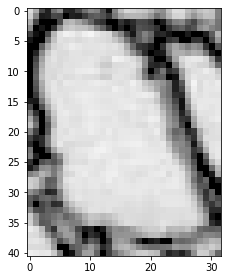

In [6]:
image = exposure.adjust_gamma(grayscale,0.5)
io.imshow(image)

### 5. Segmenting the Image

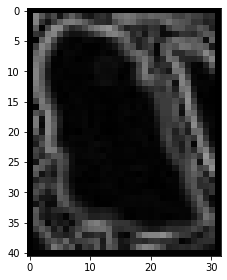

In [7]:
elevation_map = sobel(image)
io.imshow(elevation_map)

C:\Users\Joosh\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


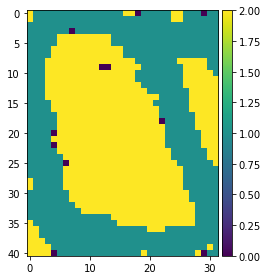

In [8]:
markers = np.zeros_like(image)
markers[image < 0.79 ] = 1
markers[image > 0.8 ] = 2

io.imshow(markers)

C:\Users\Joosh\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


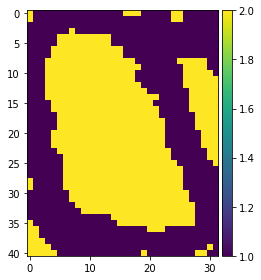

In [9]:
segmentation = watershed(elevation_map, markers)
io.imshow(segmentation)

### 6. Clean the Edges

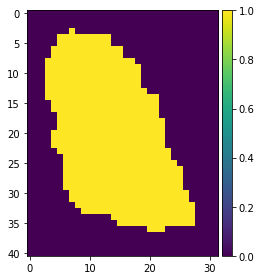

In [10]:
# apply threshold
thresh = threshold_otsu(segmentation)
bw = closing(segmentation > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

#convert bool to int
grain = cleared.astype(int)

io.imshow(grain)

In [13]:
io.imsave('Ti64_binary_V2.0.png', grain)

C:\Users\Joosh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Ti64_binary_V2.0.png is a low contrast image
  """Entry point for launching an IPython kernel.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
